
For this case study, you will perform a classification task on a WiFi dataset, and also explore the question, "Is more data useful for a classification task?"

The dataset you will use can be found on: https://archive.ics.uci.edu/ml/datasets/ujiindoorloc .

**\[Step 1\]** Once you examine the data sets, you will find that there is a training set and a validation set. You can use them to build your classification model. You might need to determine what are your features and targets. You can also do some engineering on features and targets if necessary.

**\[Step 2\]** But, which algorithm should you use with your model? You can refer to the scikit-learn cheat sheet: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html, and try three algorithms. Some suggestions are: LinearSVC, Logistic Regression, KNN classifier, SVC, Random Forest (as an example of Ensemble Learning) etc. Perform one experiment using each and observe the performance of each model. Note which is the best performing model.

**\[Step 3\]** Once the previous step is done, observe if more data is useful for a classification task using the best performing model from the previous step. For this, randomly select 20% of the training samples, but keep the size of the validation set the same. Note the performance. Then also try with 40%, 60%, 80% and 100% of the training samples. Perform three experiments for each selection. This means, for 20% you will do three experiments, 40% three experiments etc. Find the average of three experiments for each selection and plot them using a chart of your choice.

**\[Step 4\]** Publish your finding in presentation slides. Like case study 1, three of you will be randomly chosen to present your work in front of the class. The slides should inform the audience about:

* the objective of the case study
* the data (features and targets)
* things you have done (e.g. why you selected a specific classification model)
* your findings.


**Things to note**:

* **Type of task**: classification
* **Features**: you choose.
* **Feature engineering**: You are welcome to do so.
* **Target**: Use a combination of features to learn from and identify the location. Ignore the SPACEID column.

* In some cases, Normalization may result in reduced accuracy.
* You must write enough comments so that anybody with some programming knowledge can understand your code.

**Grading Criteria**:

* [15 + 15] Data set preparation: Choosing your $X$ and $y$. Feature Engineering.
* [15 + 15 + 15] Three experiments using three algorithms.  
* [15] Observing the effects of more data using five sets of random samples of different sizes from the training set. 
* [10] Presentation slides

**What to submit**:

Put the Jupyter Notebook file and the .csv file in a folder. Then convert your presentation slides in to a PDF file and put it in the same folder. Zip the folder. After zipping, it should have the extension .zip. The name of the .zip file should be firstname_lastname_casestudy_1.zip . Upload the .zip file on Canvas.

# Step 1: Data Exploration and Feature Engineering

In [186]:
#Import all necessary libraries for the study
import numpy as np
import pandas as pd
from sklearn import model_selection, linear_model, feature_selection, metrics
from datetime import datetime
from sklearn import preprocessing

In [187]:
#Read dataframe into jupyter and display the first 10 rows
df = pd.read_csv("trainingData.csv")
df.head(10)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.264300,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.621200,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.152400,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.570400,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.143600,4.864982e+06,0,0,122,2,11,13,1369909710
5,100,100,100,100,100,100,100,100,100,100,...,100,-7533.896200,4.864939e+06,2,1,105,2,2,23,1371713841
6,100,100,100,100,100,100,100,100,100,100,...,100,-7519.152400,4.864950e+06,2,1,103,2,2,23,1371713883
7,100,100,100,100,100,100,100,100,100,100,...,100,-7527.451100,4.864929e+06,2,1,101,2,2,23,1371713775
8,100,100,100,100,100,100,100,100,100,100,...,100,-7559.497300,4.864888e+06,2,1,112,2,2,23,1371714307
9,100,100,100,100,100,100,100,100,100,100,...,100,-7510.437173,4.864949e+06,2,1,103,1,2,23,1371714128


In [188]:
#Check for missing values (There are none)
df.isnull().values.any()

False

In [189]:
#Check the information associated with the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [190]:
#The most useful way to classify location is by using the buildingID and floor. However we can only have one y value so they have 
#to be combined. I turned the columns into strings so that the numbers can be concatenated into a single number called building
#code. The first number represents the buildingID while the second represents the floor. 
df['BUILDINGID'] = df['BUILDINGID'].apply(str)
df['FLOOR'] = df['FLOOR'].apply(str)
df['Building_Code'] = df['BUILDINGID'] + df['FLOOR']
df['Building_Code'] = df['Building_Code'].apply(int)
df['Building_Code']

#Load up the validation dataset
val_df = pd.read_csv("validationData.csv")

# Do the same thing for the validation dataset and add the building code
val_df['BUILDINGID'] = val_df['BUILDINGID'].apply(str)
val_df['FLOOR'] = val_df['FLOOR'].apply(str)
val_df['Building_Code'] = val_df['BUILDINGID'] + val_df['FLOOR']
val_df['Building_Code'] = val_df['Building_Code'].apply(int)
val_df['Building_Code']

0       11
1       24
2       24
3       24
4        2
        ..
1106    23
1107    23
1108     0
1109     0
1110     0
Name: Building_Code, Length: 1111, dtype: int64

In [191]:
#I did this to check to make sure that by concatenating the two columns the new building code does not have 3 values
# which would throw off the prediction accuracy (and be hard for us humans to interpret as we would have no way of knowing
# which part is the buildingID and which is the floorID). Three building codes have only one value, I assume that the 
# buildingID was zero and python removed the zero. I decided to go ahead with this method as the context of the location is 
# not lost by the removed zero and I dont expect the prediction algorithms to misclassify. 
# I should still be able to predict and interpret the correct location with this building code knowing that 2 just means
# buildingID = 0 and FloorID = 2.
df['Building_Code'].value_counts()

23    2709
21    2162
20    1942
22    1577
11    1484
2     1443
12    1396
3     1391
10    1368
1     1356
24    1102
0     1059
13     948
Name: Building_Code, dtype: int64

In [192]:
# Check if there are distinct phone ID groups. There are 16 distinct phoneID groups
df.groupby(['PHONEID']).ngroups

16

In [193]:
#And 18 distinct userID groups
df.groupby(['USERID']).ngroups

18

In [194]:
# You would think that there is a connection between phoneID and userID but there are different numbers of groups in the
# columns. Might bet worth trying different combinations of these columns.

In [195]:
#Time may be independent of location but if the people connecting to the different access points are moving in certain 
#patterns it might be a useful metric to include. Coverted to year-month-day format so that humans can read it (cant
#actually use this but was just curious how about this feature). #Data taken over about a 45 min interval. 
df['TIMESTAMP'].sort_values()
df['Converted_Time'] = pd.to_datetime(df['TIMESTAMP'], unit = 's')
df['Converted_Time']

0       2013-06-20 07:35:33
1       2013-06-20 07:34:51
2       2013-06-20 07:41:35
3       2013-06-20 07:36:47
4       2013-05-30 10:28:30
                ...        
19932   2013-06-20 06:44:43
19933   2013-06-20 06:40:02
19934   2013-06-20 06:48:41
19935   2013-06-20 06:50:49
19936   2013-06-20 06:50:25
Name: Converted_Time, Length: 19937, dtype: datetime64[ns]

In [196]:
# For x values to be tested longitude, latitude, and spaceID were removed from early consideration because they are similar
# to the y value in terms of our goal and didn't add to the accuracy.
# I attempted to use TIMESTAMP as part of my model but the accuracy fell with its inclusion so it was removed from
# consideration. The large values of unix time likely threw off it off.
#Finally, the columns for relative position, userID, and phoneId while I hoped would add to the accuracy in fact caused it
#to fall when tested. This resulted in the columns for WAP001 to WAP520 to be chosen as the predictor columns. 

# Step 2 - Apply Algorithms to the training set and see how they perform on the validation set

In [197]:
#Assign connection data for test dataframe and validation dataframe to a variable
connectionData = df.iloc[:,0:520]
valConnectionData = val_df.iloc[:,0:520]

In [198]:
#Use all the samples from the training and validation data (no splitting of datasets)

#Create preprocessing object for max abs scaler
max_abs_scaler = preprocessing.MaxAbsScaler()

# Fit and transform the predictor columns for training and validation datasets
xtrain_maxabs = max_abs_scaler.fit_transform(connectionData)
xval_maxabs = max_abs_scaler.fit_transform(valConnectionData)

#Select out response columns from data frames
y = df['Building_Code']

val_y = val_df['Building_Code']

#Note from unscaled (not normailized) vs scaled (normalized) tests:
#Unscaled dataframes performed overall better than the scaled dataframes with an F-1 score usually a few hundredths of a point higher
#higher. However, the unscaled dataframes for most of my classifiers still mostly missed the 0.8 F-1 mark that I am looking 
#for. Random Forest performed the best and was similar (had the same F-1 score) in scaled and unscaled tests 
# in terms of accuracy there was no change in accuracy until the 6th decimal place where scaled was better so they were comparable in that respect.
#I continued using scaled data throughout the subsequent experiments (and in the shown experiments) since there was no real
#difference in accuracy for the classifier I chose to use in step 3 (since I cant use the others due to low accuracy)
#and it came down to personal preference. 

## 1. Linear SVC

In [199]:
#Import important libraries
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [200]:
#Define the classifier. Use default parameters for the class
lsvc = LinearSVC(verbose = 0)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

LinearSVC()

In [201]:
#Fit the model on the training data and check the accuracy score
lsvc.fit(xtrain_maxabs, y)
score = lsvc.score(connectionData, y)
print("Score: ", score)

Score:  0.9276220093293875


C:\Users\joshu\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [202]:
#Now to see how well it predicts y from the validation set. 
#Create a y prediction variable and load up a classification report.
yprediction = lsvc.predict(xval_maxabs)

cr = classification_report(val_y, yprediction)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.62      0.73        78
           1       0.74      0.80      0.77       208
           2       0.73      0.70      0.71       165
           3       0.81      0.79      0.80        85
          10       0.53      0.70      0.60        30
          11       0.85      0.61      0.71       143
          12       0.64      0.67      0.65        87
          13       0.61      0.85      0.71        47
          20       0.59      0.83      0.69        24
          21       0.77      0.87      0.82       111
          22       0.74      0.31      0.44        54
          23       0.40      0.95      0.57        40
          24       0.95      0.46      0.62        39

    accuracy                           0.71      1111
   macro avg       0.71      0.70      0.68      1111
weighted avg       0.75      0.71      0.71      1111



In [203]:
# On the unscaled data:
# Accuracy Score (Training Data): 0.8497767969102673
# # F-1 Score Acccuracy: 0.66

## 2. Logistic Regression

In [204]:
#Import the libraries 
from sklearn.linear_model import LogisticRegression

#instantiate the model
logregression = LogisticRegression(max_iter=10000)

#Fit the model
logregression.fit(xtrain_maxabs, y)

#Print accuracy score
log_score = logregression.score(xtrain_maxabs, y)
print("Score: ", log_score)

Score:  0.9655916135827858


In [205]:
#Now to see how well it predicts y from the validation set. 
#Create a y prediction variable and load up a classification report.
logYPrediction = logregression.predict(xval_maxabs)

cr = classification_report(val_y, logYPrediction)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        78
           1       0.89      0.82      0.85       208
           2       0.73      0.81      0.77       165
           3       0.76      0.80      0.78        85
          10       0.48      0.73      0.58        30
          11       0.95      0.60      0.74       143
          12       0.62      0.78      0.69        87
          13       0.64      0.81      0.72        47
          20       0.79      0.92      0.85        24
          21       0.88      0.93      0.90       111
          22       0.92      0.61      0.73        54
          23       0.58      0.97      0.73        40
          24       0.96      0.56      0.71        39

    accuracy                           0.78      1111
   macro avg       0.77      0.78      0.76      1111
weighted avg       0.81      0.78      0.78      1111



In [206]:
# On the unscaled data logistic regression takes a super long time to run so the important bits that are found are recorded
# here so I don't have to keep running every single time I want to check:
# Accuracy Score (Training Data): 0.9715102573105282
# # F-1 Score Acccuracy: 0.73

## 3. Random Forest

In [207]:
#Import the libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Create a classifier
clf=RandomForestClassifier(n_estimators=6)

#Train the model and set up the y prediction variable
clf.fit(xtrain_maxabs, y)

#Print accuracy score
rf_score = clf.score(xtrain_maxabs, y)
print("Score: ", rf_score)

Score:  0.9967898881476651


In [208]:
#Now test the validation set on the fitted model
rfYPrediction = clf.predict(xval_maxabs)

#Show F-1 score
cr = classification_report(val_y, rfYPrediction)
print(cr)

              precision    recall  f1-score   support

           0       0.73      0.92      0.82        78
           1       0.94      0.82      0.88       208
           2       0.86      0.92      0.89       165
           3       0.92      0.86      0.89        85
          10       0.50      0.67      0.57        30
          11       0.94      0.58      0.72       143
          12       0.61      0.82      0.70        87
          13       0.63      0.83      0.72        47
          20       0.71      0.83      0.77        24
          21       0.83      0.83      0.83       111
          22       0.66      0.54      0.59        54
          23       0.60      0.85      0.70        40
          24       0.90      0.67      0.76        39

    accuracy                           0.79      1111
   macro avg       0.76      0.78      0.76      1111
weighted avg       0.82      0.79      0.79      1111



In [209]:
#On the unscaled/scaled data Random Forest appears to do the best with logistic regression performing second, and linear svc
# bringing up the rear. Logistic regression performed better on the scaled data as did linear svc but neither reached an
# accuracy of 0.8

# Random Forest performed the best in terms of accuracy and F-1 score on the validation set. I will be using it moving foreword.

# Step 3 Perform three experiments on Random Forest and see how it performs.

### 20% Training Set Data, Validation Set Same Size

#### Experiment 1

In [247]:
#Split the training data into testing and training parts. Use 80% of it as test data, remaining is training.
xtrain, xtest, ytrain, ytest = train_test_split(connectionData, y, test_size = 0.80)

#Transform the training set with the appropriate scaler.
xtrain_maxabs = max_abs_scaler.fit_transform(xtrain)

#Create a classifier
clf=RandomForestClassifier(n_estimators=6)

#Train the model and set up the y prediction variable
clf.fit(xtrain_maxabs, ytrain)

#Print accuracy score
rf_score1 = clf.score(xtrain_maxabs, ytrain)
print("Score: ", rf_score1)

Score:  0.9954853273137697


<ipython-input-247-52bec99f9bf8>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xtrain_maxabs, ytrain)


In [248]:
#Now test the validation set on the fitted model
rfYPrediction = clf.predict(xval_maxabs)

#Show F-1 score
cr = classification_report(val_y, rfYPrediction)
print(cr)

              precision    recall  f1-score   support

           0       0.63      0.92      0.75        78
           1       0.89      0.80      0.84       208
           2       0.86      0.75      0.80       165
           3       0.78      0.84      0.81        85
          10       0.73      0.73      0.73        30
          11       0.89      0.55      0.68       143
          12       0.58      0.85      0.69        87
          13       0.60      0.74      0.67        47
          20       0.63      0.92      0.75        24
          21       0.82      0.78      0.80       111
          22       0.58      0.41      0.48        54
          23       0.48      0.80      0.60        40
          24       0.88      0.54      0.67        39

    accuracy                           0.74      1111
   macro avg       0.72      0.74      0.71      1111
weighted avg       0.77      0.74      0.74      1111



#### Experiment 2

In [249]:
#Split the training data into testing and training parts. Use 80% of it as test data, remaining is training.
xtrain, xtest, ytrain, ytest = train_test_split(connectionData, y, test_size = 0.80)
#Transform the training set with the appropriate scaler.
xtrain_maxabs = max_abs_scaler.fit_transform(xtrain)
#Train the model and set up the y prediction variable
clf.fit(xtrain_maxabs, ytrain)

#Print accuracy score
rf_score2 = clf.score(xtrain_maxabs, ytrain)
print("Score: ", rf_score2)

Score:  0.9957361424630048


<ipython-input-249-37b5f9ac35a1>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xtrain_maxabs, ytrain)


In [250]:
#Now test the validation set on the fitted model
rfYPrediction = clf.predict(xval_maxabs)

#Show F-1 Score
cr = classification_report(val_y, rfYPrediction)
print(cr)

              precision    recall  f1-score   support

           0       0.64      0.87      0.74        78
           1       0.88      0.73      0.80       208
           2       0.76      0.79      0.77       165
           3       0.83      0.76      0.80        85
          10       0.52      0.77      0.62        30
          11       0.88      0.50      0.63       143
          12       0.52      0.72      0.61        87
          13       0.56      0.79      0.65        47
          20       0.44      0.92      0.59        24
          21       0.80      0.83      0.81       111
          22       0.81      0.31      0.45        54
          23       0.50      0.82      0.62        40
          24       0.76      0.41      0.53        39

    accuracy                           0.71      1111
   macro avg       0.69      0.71      0.66      1111
weighted avg       0.75      0.71      0.71      1111



#### Experiment 3

In [251]:
#Split the training data into testing and training parts. Use 80% of it as test data, remaining is training.
xtrain, xtest, ytrain, ytest = train_test_split(connectionData, y, test_size = 0.80)
#Transform the training set with the appropriate scaler.
xtrain_maxabs = max_abs_scaler.fit_transform(xtrain)
#Train the model and set up the y prediction variable
clf.fit(xtrain_maxabs, ytrain)

#Show accuracy score
rf_score3 = clf.score(xtrain_maxabs, ytrain)
print("Score: ", rf_score3)

Score:  0.9922247303737146


<ipython-input-251-bc15c04d07d4>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xtrain_maxabs, ytrain)


In [252]:
#Now test the validation set on the fitted model
rfYPrediction = clf.predict(xval_maxabs)

#Show F-1 score
cr = classification_report(val_y, rfYPrediction)
print(cr)

              precision    recall  f1-score   support

           0       0.70      0.94      0.80        78
           1       0.87      0.80      0.83       208
           2       0.85      0.76      0.80       165
           3       0.83      0.84      0.83        85
          10       0.50      0.67      0.57        30
          11       0.90      0.55      0.68       143
          12       0.62      0.82      0.70        87
          13       0.58      0.81      0.68        47
          20       0.59      0.83      0.69        24
          21       0.82      0.78      0.80       111
          22       0.74      0.46      0.57        54
          23       0.45      0.95      0.61        40
          24       0.92      0.28      0.43        39

    accuracy                           0.74      1111
   macro avg       0.72      0.73      0.69      1111
weighted avg       0.78      0.74      0.74      1111



#### Average of Scores

In [253]:
#Average the prediction accuracy three scores obtained from experiment 
average_accuracy20 = (rf_score1 + rf_score2 + rf_score3)/3

#Averge the F-1 scores obtained from experiment (note may be different from what is shown in slides because I cant figure
#out how to directly store the F-1 score as a variable)
average_F120 = (0.75 + 0.74 + 0.74)/3

#Display the above information
print("Average Accuracy for 20% Training Data: ", average_accuracy20)
print("Average F-1 Accuracy for 20% Training Data: ", average_F120)

Average Accuracy for 20% Training Data:  0.9944820667168296
Average F-1 Accuracy for 20% Training Data:  0.7433333333333333


### 40% Training Set Data, Validation Set Same Size

#### Experiment 1

In [254]:
#Split the training data into testing and training parts. Use 60% of it as test data, remaining is training.
xtrain, xtest, ytrain, ytest = train_test_split(connectionData, y, test_size = 0.60)

#Transform the training set with the appropriate scaler.
xtrain_maxabs = max_abs_scaler.fit_transform(xtrain)

#Create a classifier
clf=RandomForestClassifier(n_estimators=6)

#Train the model and set up the y prediction variable
clf.fit(xtrain_maxabs, ytrain)

#Display prediction score
rf_score1 = clf.score(xtrain_maxabs, ytrain)
print("Score: ", rf_score1)

<ipython-input-254-b7a1ec06e990>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xtrain_maxabs, ytrain)


Score:  0.9966139954853274


In [255]:
#Now test the validation set on the fitted model
rfYPrediction = clf.predict(xval_maxabs)

#Display F-1 scores
cr = classification_report(val_y, rfYPrediction)
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        78
           1       0.89      0.86      0.88       208
           2       0.87      0.85      0.86       165
           3       0.91      0.85      0.88        85
          10       0.70      0.77      0.73        30
          11       0.93      0.60      0.73       143
          12       0.60      0.84      0.70        87
          13       0.67      0.85      0.75        47
          20       0.63      0.92      0.75        24
          21       0.86      0.86      0.86       111
          22       0.80      0.44      0.57        54
          23       0.54      0.93      0.69        40
          24       1.00      0.62      0.76        39

    accuracy                           0.80      1111
   macro avg       0.78      0.79      0.77      1111
weighted avg       0.83      0.80      0.80      1111



#### Experiment 2

In [256]:
#Split the training data into testing and training parts. Use 60% of it as test data, remaining is training.
xtrain, xtest, ytrain, ytest = train_test_split(connectionData, y, test_size = 0.60)
#Transform the training set with the appropriate scaler.
xtrain_maxabs = max_abs_scaler.fit_transform(xtrain)
#Train the model and set up the y prediction variable
clf.fit(xtrain_maxabs, ytrain)

#Display prediction score
rf_score2 = clf.score(xtrain_maxabs, ytrain)
print("Score: ", rf_score2)

Score:  0.9966139954853274


<ipython-input-256-a3fe86d1042b>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xtrain_maxabs, ytrain)


In [257]:
#Now test the validation set on the fitted model
rfYPrediction = clf.predict(xval_maxabs)

#Display F-1 score
cr = classification_report(val_y, rfYPrediction)
print(cr)

              precision    recall  f1-score   support

           0       0.64      0.96      0.77        78
           1       0.89      0.80      0.85       208
           2       0.89      0.81      0.85       165
           3       0.90      0.84      0.87        85
          10       0.60      0.83      0.69        30
          11       0.94      0.59      0.72       143
          12       0.64      0.89      0.74        87
          13       0.71      0.83      0.76        47
          20       0.56      0.83      0.67        24
          21       0.90      0.85      0.87       111
          22       0.79      0.56      0.65        54
          23       0.56      0.93      0.70        40
          24       0.92      0.62      0.74        39

    accuracy                           0.79      1111
   macro avg       0.76      0.79      0.76      1111
weighted avg       0.82      0.79      0.79      1111



#### Experiment 3

In [258]:
#Split the training data into testing and training parts. Use 60% of it as test data, remaining is training.
xtrain, xtest, ytrain, ytest = train_test_split(connectionData, y, test_size = 0.60)
#Transform the training set with the appropriate scaler.
xtrain_maxabs = max_abs_scaler.fit_transform(xtrain)
#Train the model and set up the y prediction variable
clf.fit(xtrain_maxabs, ytrain)

#Display prediction score
rf_score3 = clf.score(xtrain_maxabs, ytrain)
print("Score: ", rf_score3)

Score:  0.9954853273137697


<ipython-input-258-aee5a0368dc8>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xtrain_maxabs, ytrain)


In [259]:
#Now test the validation set on the fitted model
rfYPrediction = clf.predict(xval_maxabs)

#Display F-1 score
cr = classification_report(val_y, rfYPrediction)
print(cr)

              precision    recall  f1-score   support

           0       0.73      0.92      0.82        78
           1       0.90      0.88      0.89       208
           2       0.91      0.82      0.86       165
           3       0.88      0.88      0.88        85
          10       0.59      0.80      0.68        30
          11       0.95      0.49      0.65       143
          12       0.53      0.84      0.65        87
          13       0.70      0.81      0.75        47
          20       0.65      0.83      0.73        24
          21       0.82      0.87      0.84       111
          22       0.71      0.41      0.52        54
          23       0.53      0.93      0.67        40
          24       1.00      0.46      0.63        39

    accuracy                           0.78      1111
   macro avg       0.76      0.76      0.74      1111
weighted avg       0.81      0.78      0.77      1111



#### Average of Scores

In [260]:
#Calculate average prediction accuracy and average F-1 score and display both
average_accuracy40 = (rf_score1 + rf_score2 + rf_score3)/3
average_F140 = (0.78 + 0.80 + 0.77)/3
print("Average Accuracy for 40% Training Data: ", average_accuracy40)
print("Average F-1 Accuracy for 40% Training Data: ", average_F140)

Average Accuracy for 40% Training Data:  0.9962377727614747
Average F-1 Accuracy for 40% Training Data:  0.7833333333333333


### 60% Training Set Data, Validation Set Same Size

#### Experiment 1

In [261]:
#Split the training data into testing and training parts. Use 40% of it as test data, remaining is training.
xtrain, xtest, ytrain, ytest = train_test_split(connectionData, y, test_size = 0.40)

#Transform the training set with the appropriate scaler.
xtrain_maxabs = max_abs_scaler.fit_transform(xtrain)

#Create a classifier
clf=RandomForestClassifier(n_estimators=6)

#Train the model and set up the y prediction variable
clf.fit(xtrain_maxabs, ytrain)

#Display prediction accuracy
rf_score1 = clf.score(xtrain_maxabs, ytrain)
print("Score: ", rf_score1)

<ipython-input-261-c8618506b387>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xtrain_maxabs, ytrain)


Score:  0.9963216853369001


In [262]:
#Now test the validation set on the fitted model
rfYPrediction = clf.predict(xval_maxabs)

#Display F-1 score
cr = classification_report(val_y, rfYPrediction)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        78
           1       0.96      0.83      0.89       208
           2       0.84      0.87      0.86       165
           3       0.87      0.88      0.88        85
          10       0.61      0.77      0.68        30
          11       0.92      0.58      0.71       143
          12       0.60      0.92      0.73        87
          13       0.70      0.79      0.74        47
          20       0.53      0.96      0.69        24
          21       0.86      0.84      0.85       111
          22       0.90      0.50      0.64        54
          23       0.62      0.97      0.76        40
          24       0.95      0.54      0.69        39

    accuracy                           0.80      1111
   macro avg       0.78      0.80      0.77      1111
weighted avg       0.83      0.80      0.80      1111



#### Experiment 2

In [263]:
#Split the training data into testing and training parts. Use 40% of it as test data, remaining is training.
xtrain, xtest, ytrain, ytest = train_test_split(connectionData, y, test_size = 0.40)
#Transform the training set with the appropriate scaler.
xtrain_maxabs = max_abs_scaler.fit_transform(xtrain)
#Train the model and set up the y prediction variable
clf.fit(xtrain_maxabs, ytrain)

#Display prediction accuracy
rf_score2 = clf.score(xtrain_maxabs, ytrain)
print("Score: ", rf_score2)

<ipython-input-263-67ffdbda5333>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xtrain_maxabs, ytrain)


Score:  0.9959872930948002


In [264]:
#Now test the validation set on the fitted model
rfYPrediction = clf.predict(xval_maxabs)

#Display F-1 score
cr = classification_report(val_y, rfYPrediction)
print(cr)

              precision    recall  f1-score   support

           0       0.64      0.87      0.74        78
           1       0.89      0.78      0.83       208
           2       0.87      0.88      0.88       165
           3       0.91      0.81      0.86        85
          10       0.57      0.70      0.63        30
          11       0.93      0.49      0.64       143
          12       0.55      0.91      0.69        87
          13       0.76      0.87      0.81        47
          20       0.58      0.92      0.71        24
          21       0.86      0.82      0.84       111
          22       0.75      0.50      0.60        54
          23       0.51      0.85      0.64        40
          24       0.88      0.54      0.67        39

    accuracy                           0.77      1111
   macro avg       0.75      0.76      0.73      1111
weighted avg       0.81      0.77      0.77      1111



#### Experiment 3

In [265]:
#Split the training data into testing and training parts. Use 40% of it as test data, remaining is training.
xtrain, xtest, ytrain, ytest = train_test_split(connectionData, y, test_size = 0.40)
#Transform the training set with the appropriate scaler.
xtrain_maxabs = max_abs_scaler.fit_transform(xtrain)
#Train the model and set up the y prediction variable
clf.fit(xtrain_maxabs, ytrain)

#Display prediction accuracy
rf_score3 = clf.score(xtrain_maxabs, ytrain)
print("Score: ", rf_score3)

<ipython-input-265-ac06ff7cca89>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xtrain_maxabs, ytrain)


Score:  0.9963216853369001


In [266]:
#Now test the validation set on the fitted model
rfYPrediction = clf.predict(xval_maxabs)

cr = classification_report(val_y, rfYPrediction)
print(cr)

              precision    recall  f1-score   support

           0       0.63      0.91      0.75        78
           1       0.90      0.78      0.83       208
           2       0.88      0.87      0.87       165
           3       0.91      0.88      0.90        85
          10       0.65      0.73      0.69        30
          11       0.89      0.59      0.71       143
          12       0.62      0.90      0.73        87
          13       0.82      0.85      0.83        47
          20       0.65      0.83      0.73        24
          21       0.82      0.87      0.85       111
          22       0.74      0.37      0.49        54
          23       0.50      0.88      0.64        40
          24       0.79      0.49      0.60        39

    accuracy                           0.78      1111
   macro avg       0.75      0.77      0.74      1111
weighted avg       0.81      0.78      0.78      1111



#### Average of Scores

In [267]:
#Average the prediction accuracy and F-1 scores. Display them.
average_accuracy60 = (rf_score1 + rf_score2 + rf_score3)/3
average_F160 = (0.78 + 0.78 + 0.79)/3
print("Average Accuracy for 60% Training Data: ", average_accuracy60)
print("Average F-1 Accuracy for 60% Training Data: ", average_F160)

Average Accuracy for 60% Training Data:  0.9962102212562002
Average F-1 Accuracy for 60% Training Data:  0.7833333333333333


### 80% Training Set Data, Validation Set Same Size

#### Experiment 1

In [268]:
#Split the training data into testing and training parts. Use 20% of it as test data, remaining is training.
xtrain, xtest, ytrain, ytest = train_test_split(connectionData, y, test_size = 0.20)

#Transform the training set with the appropriate scaler.
xtrain_maxabs = max_abs_scaler.fit_transform(xtrain)

#Create a classifier
clf=RandomForestClassifier(n_estimators=6)

#Train the model and set up the y prediction variable
clf.fit(xtrain_maxabs, ytrain)

#Display prediction accuracy
rf_score1 = clf.score(xtrain_maxabs, ytrain)
print("Score: ", rf_score1)

<ipython-input-268-dce0e2646ecc>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xtrain_maxabs, ytrain)


Score:  0.9966769076431125


In [269]:
#Now test the validation set on the fitted model
rfYPrediction = clf.predict(xval_maxabs)

#Display F-1 score
cr = classification_report(val_y, rfYPrediction)
print(cr)

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        78
           1       0.92      0.84      0.87       208
           2       0.84      0.86      0.85       165
           3       0.89      0.87      0.88        85
          10       0.68      0.83      0.75        30
          11       0.94      0.55      0.69       143
          12       0.57      0.83      0.68        87
          13       0.68      0.87      0.77        47
          20       0.81      0.92      0.86        24
          21       0.88      0.89      0.88       111
          22       0.76      0.57      0.65        54
          23       0.56      0.88      0.69        40
          24       0.92      0.59      0.72        39

    accuracy                           0.80      1111
   macro avg       0.78      0.80      0.78      1111
weighted avg       0.82      0.80      0.80      1111



#### Experiment 2

In [270]:
#Split the training data into testing and training parts. Use 20% of it as test data, remaining is training.
xtrain, xtest, ytrain, ytest = train_test_split(connectionData, y, test_size = 0.20)
#Transform the training set with the appropriate scaler.
xtrain_maxabs = max_abs_scaler.fit_transform(xtrain)
#Train the model and set up the y prediction variable
clf.fit(xtrain_maxabs, ytrain)

#Display prediction accuracy
rf_score2 = clf.score(xtrain_maxabs, ytrain)
print("Score: ", rf_score2)

<ipython-input-270-f30d59d64c68>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xtrain_maxabs, ytrain)


Score:  0.9964888080757415


In [271]:
#Now test the validation set on the fitted model
rfYPrediction = clf.predict(xval_maxabs)

#Display F-1 score
cr = classification_report(val_y, rfYPrediction)
print(cr)

              precision    recall  f1-score   support

           0       0.72      0.92      0.81        78
           1       0.91      0.83      0.87       208
           2       0.83      0.82      0.83       165
           3       0.88      0.85      0.86        85
          10       0.66      0.83      0.74        30
          11       0.93      0.61      0.73       143
          12       0.61      0.83      0.70        87
          13       0.74      0.85      0.79        47
          20       0.66      0.88      0.75        24
          21       0.90      0.84      0.87       111
          22       0.65      0.44      0.53        54
          23       0.46      0.90      0.61        40
          24       0.89      0.44      0.59        39

    accuracy                           0.78      1111
   macro avg       0.76      0.77      0.74      1111
weighted avg       0.81      0.78      0.78      1111



#### Experiment 3

In [272]:
#Split the training data into testing and training parts. Use 20% of it as test data, remaining is training.
xtrain, xtest, ytrain, ytest = train_test_split(connectionData, y, test_size = 0.20)
#Transform the training set with the appropriate scaler.
xtrain_maxabs = max_abs_scaler.fit_transform(xtrain)
#Train the model and set up the y prediction variable
clf.fit(xtrain_maxabs, ytrain)

#Display prediction accuracy
rf_score3 = clf.score(xtrain_maxabs, ytrain)
print("Score: ", rf_score3)

<ipython-input-272-dbfa5d1a7c5e>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xtrain_maxabs, ytrain)


Score:  0.9968023073546931


In [273]:
#Now test the validation set on the fitted model
rfYPrediction = clf.predict(xval_maxabs)

#Display F-1 score
cr = classification_report(val_y, rfYPrediction)
print(cr)

              precision    recall  f1-score   support

           0       0.67      0.92      0.78        78
           1       0.90      0.81      0.86       208
           2       0.87      0.90      0.88       165
           3       0.92      0.78      0.84        85
          10       0.55      0.77      0.64        30
          11       0.90      0.58      0.71       143
          12       0.61      0.85      0.71        87
          13       0.73      0.79      0.76        47
          20       0.73      0.92      0.81        24
          21       0.86      0.91      0.89       111
          22       0.89      0.44      0.59        54
          23       0.58      0.95      0.72        40
          24       0.93      0.67      0.78        39

    accuracy                           0.79      1111
   macro avg       0.78      0.79      0.77      1111
weighted avg       0.82      0.79      0.79      1111



#### Average of Scores

In [274]:
#Average prediction accuracy and F-1 scores. Display them. 
average_accuracy80 = (rf_score1 + rf_score2 + rf_score3)/3
average_F180 = (0.80 + 0.79 + 0.80)/3
print("Average Accuracy for 80% Training Data: ", average_accuracy80)
print("Average F-1 Accuracy for 80% Training Data: ", average_F180)

Average Accuracy for 80% Training Data:  0.9966560076911822
Average F-1 Accuracy for 80% Training Data:  0.7966666666666667


### 100% Training Set Data, Validation Set Same Size

#### Experiment 1

In [275]:
# Fit and transform the predictor columns for training and validation datasets
xtrain_maxabs = max_abs_scaler.fit_transform(connectionData)
xval_maxabs = max_abs_scaler.fit_transform(valConnectionData)

#Select out response columns from data frames
y = df.loc[:,['Building_Code']]
val_y = val_df['Building_Code']

#Create a classifier
clf=RandomForestClassifier(n_estimators=6)

#Train the model and set up the y prediction variable
clf.fit(xtrain_maxabs, y)

#Display prediction score
rf_score1 = clf.score(xtrain_maxabs, y)
print("Score: ", rf_score1)

<ipython-input-275-e81b4def3a1c>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xtrain_maxabs, y)


Score:  0.9969403621407433


In [276]:
#Now test the validation set on the fitted model
rfYPrediction = clf.predict(xval_maxabs)

#Display F-1 score
cr = classification_report(val_y, rfYPrediction)
print(cr)

              precision    recall  f1-score   support

           0       0.69      0.96      0.81        78
           1       0.95      0.81      0.87       208
           2       0.86      0.92      0.89       165
           3       0.95      0.87      0.91        85
          10       0.92      0.77      0.84        30
          11       0.94      0.71      0.81       143
          12       0.65      0.90      0.75        87
          13       0.80      0.85      0.82        47
          20       0.67      0.83      0.74        24
          21       0.87      0.94      0.90       111
          22       0.83      0.54      0.65        54
          23       0.53      0.93      0.67        40
          24       1.00      0.44      0.61        39

    accuracy                           0.83      1111
   macro avg       0.82      0.80      0.79      1111
weighted avg       0.85      0.83      0.83      1111



#### Experiment 2

In [277]:
# Fit and transform the predictor columns for training and validation datasets
xtrain_maxabs = max_abs_scaler.fit_transform(connectionData)
xval_maxabs = max_abs_scaler.fit_transform(valConnectionData)

#Select out response columns from data frames
y = df.loc[:,['Building_Code']]
val_y = val_df['Building_Code']

#Create a classifier
clf=RandomForestClassifier(n_estimators=6)

#Train the model and set up the y prediction variable
clf.fit(xtrain_maxabs, y)

#Display prediction accuracy
rf_score2 = clf.score(xtrain_maxabs, y)
print("Score: ", rf_score2)

<ipython-input-277-c46aa1451fdf>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xtrain_maxabs, y)


Score:  0.9968400461453579


In [278]:
#Now test the validation set on the fitted model
rfYPrediction = clf.predict(xval_maxabs)

#Display F-1 score
cr = classification_report(val_y, rfYPrediction)
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.94      0.84        78
           1       0.93      0.87      0.90       208
           2       0.85      0.87      0.86       165
           3       0.91      0.82      0.86        85
          10       0.71      0.80      0.75        30
          11       0.95      0.59      0.73       143
          12       0.58      0.90      0.71        87
          13       0.77      0.85      0.81        47
          20       0.71      0.92      0.80        24
          21       0.82      0.88      0.85       111
          22       0.82      0.50      0.62        54
          23       0.64      0.93      0.76        40
          24       0.88      0.59      0.71        39

    accuracy                           0.81      1111
   macro avg       0.80      0.80      0.78      1111
weighted avg       0.83      0.81      0.81      1111



#### Experiment 3

In [279]:
# Fit and transform the predictor columns for training and validation datasets
xtrain_maxabs = max_abs_scaler.fit_transform(connectionData)
xval_maxabs = max_abs_scaler.fit_transform(valConnectionData)

#Select out response columns from data frames
y = df.loc[:,['Building_Code']]
val_y = val_df['Building_Code']

#Create a classifier
clf=RandomForestClassifier(n_estimators=6)

#Train the model and set up the y prediction variable
clf.fit(xtrain_maxabs, y)

#Display prediction accuracy
rf_score3 = clf.score(xtrain_maxabs, y)
print("Score: ", rf_score3)

<ipython-input-279-0003dc206f07>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xtrain_maxabs, y)


Score:  0.996990520138436


In [280]:
#Now test the validation set on the fitted model
rfYPrediction = clf.predict(xval_maxabs)

#Display F-1 score
cr = classification_report(val_y, rfYPrediction)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        78
           1       0.95      0.82      0.88       208
           2       0.87      0.91      0.89       165
           3       0.93      0.88      0.90        85
          10       0.68      0.83      0.75        30
          11       0.95      0.63      0.76       143
          12       0.62      0.91      0.73        87
          13       0.71      0.77      0.73        47
          20       0.67      0.92      0.77        24
          21       0.88      0.89      0.89       111
          22       0.85      0.63      0.72        54
          23       0.58      0.90      0.71        40
          24       1.00      0.54      0.70        39

    accuracy                           0.82      1111
   macro avg       0.80      0.81      0.79      1111
weighted avg       0.85      0.82      0.82      1111



#### Average of Scores

In [281]:
#Display average prediction accuracy and F-1 score. Display them.
average_accuracy100 = (rf_score1 + rf_score2 + rf_score3)/3
average_F1100 = (0.80 + 0.78 + 0.80)/3
print("Average Accuracy for 100% Training Data: ", average_accuracy100)
print("Average F-1 Accuracy for 100% Training Data: ", average_F1100)

Average Accuracy for 100% Training Data:  0.996923642808179
Average F-1 Accuracy for 100% Training Data:  0.7933333333333333


### Plots of Average Scores

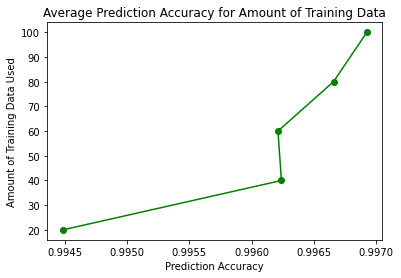

In [282]:
#Import libraries
import matplotlib.pyplot as plt

#Set what to plot for the x/y axis
xAxis = [average_accuracy20, average_accuracy40, average_accuracy60, average_accuracy80, average_accuracy100]
yAxis = [20, 40, 60, 80, 100]

#Set graph title, x-axis title, y-axis title, and plot the line graph
plt.plot(xAxis,yAxis, color = 'green', marker = 'o')
plt.title('Average Prediction Accuracy for Amount of Training Data')
plt.xlabel('Prediction Accuracy')
plt.ylabel('Amount of Training Data Used')
plt.show()

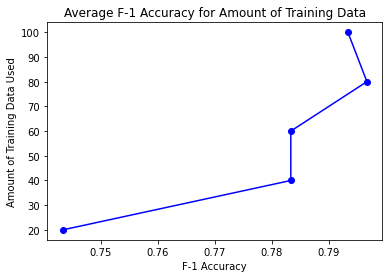

In [283]:
#Set what to plot for the x/y axis
xAxis = [0.7433333333333333, 0.7833333333333333, 0.7833333333333333, 0.7966666666666667, 0.7933333333333333]
yAxis = [20, 40, 60, 80, 100]

#Set graph title, x-axis title, y-axis title, and plot the line graph
plt.plot(xAxis,yAxis, color = 'blue', marker = 'o')
plt.title('Average F-1 Accuracy for Amount of Training Data')
plt.xlabel('F-1 Accuracy')
plt.ylabel('Amount of Training Data Used')
plt.show()